<a href="https://colab.research.google.com/github/Lukerabr/Colab/blob/main/Atividade_IA_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#leitura dos dados
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLP/train.csv')

In [ ]:
#separar os dados
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_teste = data[0:1000].T
Y_test = data_teste[0]
X_test = data_teste[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
#parametros iniciais de maneira randomica
def init_params():
    peso1 = np.random.rand(10, 784) - 0.5
    bias1 = np.random.rand(10, 1) - 0.5
    peso2 = np.random.rand(10, 10) - 0.5
    bias2 = np.random.rand(10, 1) - 0.5
    return peso1, bias1, peso2, bias2

#função ReLU
def ReLU(Z):
    return np.maximum(Z, 0)

#função softmax
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

#propagação para frente    
def forward_prop(peso1, bias1, peso2, bias2, X):
    Z1 = peso1.dot(X) + bias1
    A1 = ReLU(Z1)
    Z2 = peso2.dot(A1) + bias2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#derivada da ReLU
def ReLU_deriv(Z):
    return Z > 0

#função one_hot
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#propagação de volta
def backward_prop(Z1, A1, Z2, A2, peso1, peso2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    derivada_peso2 = 1 / m * dZ2.dot(A1.T)
    derivada_bias2 = 1 / m * np.sum(dZ2)
    dZ1 = peso2.T.dot(dZ2) * ReLU_deriv(Z1)
    derivada_peso1 = 1 / m * dZ1.dot(X.T)
    derivada_bias1 = 1 / m * np.sum(dZ1)
    return derivada_peso1, derivada_bias1, derivada_peso2, derivada_bias2

#função para atualizar os parametros para encontrar o melhor conjunto
def update_params(peso1, bias1, peso2, bias2, derivada_peso1, derivada_bias1, derivada_peso2, derivada_bias2, alpha):
    peso1 = peso1 - alpha * derivada_peso1
    bias1 = bias1 - alpha * derivada_bias1    
    peso2 = peso2 - alpha * derivada_peso2  
    bias2 = bias2 - alpha * derivada_bias2    
    return peso1, bias1, peso2, bias2

In [ ]:
#predição
def get_predicao(A2):
    return np.argmax(A2, 0)

#acurácia
def accuracy(predicao, Y):
    #print(predicao, Y)
    return np.sum(predicao == Y) / Y.size

#função gradiente, e também função para iterar e atualizar os parametros
def gradient_descent(X, Y, alpha, iterations):
    peso1, bias1, peso2, bias2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(peso1, bias1, peso2, bias2, X)
        derivada_peso1, derivada_bias1, derivada_peso2, derivada_bias2 = backward_prop(Z1, A1, Z2, A2, peso1, peso2, X, Y)
        peso1, bias1, peso2, bias2 = update_params(peso1, bias1, peso2, bias2, derivada_peso1, derivada_bias1, derivada_peso2, derivada_bias2, alpha)
        if i % 2 == 0:
            print("Iteração: ", i)
            predicao = get_predicao(A2)
            print(accuracy(predicao, Y))
    return peso1, bias1, peso2, bias2

In [ ]:
#função gradiente sendo chamada e passando alfa = 0.6 e quantidade de iterações = 500
#PODE DEMORAR UM POUCO
peso1, bias1, peso2, bias2 = gradient_descent(X_train, Y_train, 0.6, 500)

Iteração:  0
0.11682926829268293
Iteração:  2
0.07831707317073171
Iteração:  4
0.08578048780487806
Iteração:  6
0.10178048780487804
Iteração:  8
0.12863414634146342
Iteração:  10
0.15778048780487805
Iteração:  12
0.18460975609756097
Iteração:  14
0.20858536585365853
Iteração:  16
0.22885365853658537
Iteração:  18
0.24697560975609756
Iteração:  20
0.2628780487804878
Iteração:  22
0.2898292682926829
Iteração:  24
0.3169512195121951
Iteração:  26
0.3433658536585366
Iteração:  28
0.3660731707317073
Iteração:  30
0.38370731707317074
Iteração:  32
0.3980975609756098
Iteração:  34
0.4144390243902439
Iteração:  36
0.4292682926829268
Iteração:  38
0.44597560975609757
Iteração:  40
0.4624878048780488
Iteração:  42
0.48253658536585364
Iteração:  44
0.5026585365853659
Iteração:  46
0.5214390243902439
Iteração:  48
0.5328536585365854
Iteração:  50
0.43085365853658536
Iteração:  52
0.4071463414634146
Iteração:  54
0.564390243902439
Iteração:  56
0.620780487804878
Iteração:  58
0.6401463414634146
Ite

In [ ]:
#teste com os pesos e bias atualizados para melhor rendimento depois das iterações
def teste_real(X, peso1, bias1, peso2, bias2):
    _, _, _, A2 = forward_prop(peso1, bias1, peso2, bias2, X)
    predicao = get_predicao(A2)
    return predicao

In [ ]:
#acurácia com os parametros atualizados
predicao_teste = teste_real(X_test, peso1, bias1, peso2, bias2)
accuracy(predicao_teste, Y_test)

0.892

In [ ]:
#teste nas amostragens
#separar os conjuntos de teste

#Conjunto 01
data_1 = np.array(data)
m, n = data_1.shape
np.random.shuffle(data_1)

data_teste_1 = data_1[0:1000].T
Y_test_1 = data_teste_1[0]
X_test_1 = data_teste_1[1:n]
X_test_1 = X_test_1 / 255.

###################################

#Conjunto 02
data_2 = np.array(data)
m, n = data_2.shape
np.random.shuffle(data_2)

data_teste_2 = data_2[0:1000].T
Y_test_2 = data_teste_2[0]
X_test_2 = data_teste_2[1:n]
X_test_2 = X_test_2 / 255.
###################################

#Conjunto 03
data_3 = np.array(data)
m, n = data_3.shape
np.random.shuffle(data_3)

data_teste_3 = data_3[0:1000].T
Y_test_3 = data_teste_3[0]
X_test_3 = data_teste_3[1:n]
X_test_3 = X_test_3 / 255.
###################################

#Conjunto 04
data_4 = np.array(data)
m, n = data_4.shape
np.random.shuffle(data_4)

data_teste_4 = data_4[0:1000].T
Y_test_4 = data_teste_4[0]
X_test_4 = data_teste_4[1:n]
X_test_4 = X_test_4 / 255.
###################################

#Conjunto 05
data_5 = np.array(data)
m, n = data_5.shape
np.random.shuffle(data_5)

data_teste_5 = data_5[0:1000].T
Y_test_5 = data_teste_5[0]
X_test_5 = data_teste_5[1:n]
X_test_5 = X_test_5 / 255.


In [ ]:
#Impressão testes
predicao_teste_1 = teste_real(X_test_1, peso1, bias1, peso2, bias2)
acuracia_1_mpl = accuracy(predicao_teste_1, Y_test_1)
print("Acurácia teste 01 MPL: ", acuracia_1_mpl)

predicao_teste_2 = teste_real(X_test_2, peso1, bias1, peso2, bias2)
acuracia_2_mpl = accuracy(predicao_teste_2, Y_test_2)
print("Acurácia teste 02 MPL: ", acuracia_2_mpl)

predicao_teste_3 = teste_real(X_test_3, peso1, bias1, peso2, bias2)
acuracia_3_mpl = accuracy(predicao_teste_3, Y_test_3)
print("Acurácia teste 03 MPL: ", acuracia_3_mpl)

predicao_teste_4 = teste_real(X_test_4, peso1, bias1, peso2, bias2)
acuracia_4_mpl = accuracy(predicao_teste_4, Y_test_4)
print("Acurácia teste 04 MPL: ", acuracia_4_mpl)

predicao_teste_5 = teste_real(X_test_5, peso1, bias1, peso2, bias2)
acuracia_5_mpl = accuracy(predicao_teste_5, Y_test_5)
print("Acurácia teste 05 MPL: ", acuracia_5_mpl)

predicoes_testes_mpl = [acuracia_1_mpl, acuracia_2_mpl, acuracia_3_mpl, acuracia_4_mpl, acuracia_5_mpl]

Acurácia teste 01 MPL:  0.898
Acurácia teste 02 MPL:  0.904
Acurácia teste 03 MPL:  0.907
Acurácia teste 04 MPL:  0.894
Acurácia teste 05 MPL:  0.904


In [ ]:
#Média e desvio padrão MPL

print("Média testes MPL:", np.mean(predicoes_testes_mpl))

print("Média testes MPL:", np.std(predicoes_testes_mpl))

Média testes MPL: 0.9014000000000001
Média testes MPL: 0.004715930449020642


#KNN

In [ ]:
#######################################
#KNN
#######################################
import numpy as np
import operator 
from operator import itemgetter
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


#importar o dataset
mnist = load_digits()

x = mnist.data 
y = mnist.target

In [ ]:
#separar o dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

#5 amostragens
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.25)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.25)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.25)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x, y, test_size=0.25)
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x, y, test_size=0.25)

In [ ]:
#função para retornar a distancia euclidiana de dois pontos
def dist_eucli(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

#CLASSE KNN

class KNN:
  def __init__(self, K = 3):
    self.K = K

  #função que inicializa instâncias para ajustar nosso conjunto de treinamento.
  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  #função para predizer, utilizará o conjunto de teste
  def predicao(self, X_test):
    predicoes = [] 
    for i in range(len(X_test)):
        dist = np.array([dist_eucli(X_test[i], x_t) for x_t in   
        self.x_train])
        dist_sorted = dist.argsort()[:self.K]
        neigh_count = {}
        for idx in dist_sorted:
            if self.y_train[idx] in neigh_count:
                neigh_count[self.y_train[idx]] += 1
            else:
                neigh_count[self.y_train[idx]] = 1
        sorted_neigh_count = sorted(neigh_count.items(),    
        key=operator.itemgetter(1), reverse=True)
        predicoes.append(sorted_neigh_count[0][0]) 
    return predicoes 

In [ ]:
#treinar o modelo em todos os valores K possíveis de 3 a 100

valores_K = np.arange(3, 100 ,1)
accuracy = []
for k in valores_K:
  model = KNN(K = k)
  model.fit(x_train, y_train)
  pred = model.predicao(x_test)
  acc = accuracy_score(y_test, pred)
  accuracy.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9755555555555555
K = 4; Accuracy: 0.9755555555555555
K = 5; Accuracy: 0.9755555555555555
K = 6; Accuracy: 0.9755555555555555
K = 7; Accuracy: 0.9755555555555555
K = 8; Accuracy: 0.9777777777777777
K = 9; Accuracy: 0.9755555555555555
K = 10; Accuracy: 0.9777777777777777
K = 11; Accuracy: 0.9733333333333334
K = 12; Accuracy: 0.9733333333333334
K = 13; Accuracy: 0.9711111111111111
K = 14; Accuracy: 0.9733333333333334
K = 15; Accuracy: 0.9688888888888889
K = 16; Accuracy: 0.9733333333333334
K = 17; Accuracy: 0.9666666666666667
K = 18; Accuracy: 0.9711111111111111
K = 19; Accuracy: 0.9666666666666667
K = 20; Accuracy: 0.9666666666666667
K = 21; Accuracy: 0.9666666666666667
K = 22; Accuracy: 0.9688888888888889
K = 23; Accuracy: 0.9644444444444444
K = 24; Accuracy: 0.9644444444444444
K = 25; Accuracy: 0.9644444444444444
K = 26; Accuracy: 0.9644444444444444
K = 27; Accuracy: 0.9666666666666667
K = 28; Accuracy: 0.9644444444444444
K = 29; Accuracy: 0.9622222222222222
K = 30; 

In [ ]:
#recuperando o indice de maior valor de acurácia
indice_maior_valor = accuracy.index(max(accuracy))
print(indice_maior_valor)

5


In [ ]:
#realização do teste
model = KNN(K = 5)
model.fit(x_train, y_train)
pred = model.predicao(x_test)
acc = accuracy_score(y_test, pred)
print("Acurácia do teste: ",  acc)

Acurácia do teste:  0.9755555555555555


In [ ]:
#teste com as 5 amostragens diferentes
#x_treino = [x_train_1, x_train_2, x_train_3, x_train_4, x_train_5]
#y_treino = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5]
#x_teste = [x_test_1, x_test_2, x_test_3, x_test_4, x_test_5]
#y_teste = [y_test_1, y_test_2, y_test_3, y_test_4, y_test_5]

model.fit(x_train_1, y_train_1)
pred = model.predicao(x_test_1)
acc_1 = accuracy_score(y_test_1, pred)
print("Acurácia do teste 1: ",  acc_1)

model.fit(x_train_2, y_train_2)
pred = model.predicao(x_test_2)
acc_2 = accuracy_score(y_test_2, pred)
print("Acurácia do teste 2: ",  acc_2)

model.fit(x_train_3, y_train_3)
pred = model.predicao(x_test_3)
acc_3 = accuracy_score(y_test_3, pred)
print("Acurácia do teste 3: ",  acc_3)

model.fit(x_train_4, y_train_4)
pred = model.predicao(x_test_4)
acc_4 = accuracy_score(y_test_4, pred)
print("Acurácia do teste 4: ",  acc_4)

model.fit(x_train_5, y_train_5)
pred = model.predicao(x_test_5)
acc_5 = accuracy_score(y_test_5, pred)
print("Acurácia do teste 5: ",  acc_5)

Acurácia do teste 1:  0.9888888888888889
Acurácia do teste 2:  0.9866666666666667
Acurácia do teste 3:  0.98
Acurácia do teste 4:  0.9888888888888889
Acurácia do teste 5:  0.9822222222222222


In [ ]:
#média e desvio padrão da acurácia do KNN

media_knn = (acc_1 + acc_2 + acc_3 + acc_4 + acc_5) / 5
print("Média acurácia KNN:", media_knn)

acuracias_knn = [acc_1, acc_2, acc_3, acc_4, acc_5]
desvio_padrao_knn = np.std(acuracias_knn)
print("Desvio padrão KNN: ", desvio_padrao_knn)

Média acurácia KNN: 0.9853333333333334
Desvio padrão KNN:  0.0036106837353937836


#DECISION TREE

In [ ]:
#importar os dados
data_DT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLP/train.csv')

In [ ]:
#separar teste e treino

x = data_DT.iloc[:,1:]
y = data_DT.iloc[:,0]

x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x, y, test_size = 0.2)

In [ ]:
#Arvore de decisão

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.model_selection import cross_val_predict

arvore = DecisionTreeClassifier()

arvore.fit(x_train_dt , y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#predição para matriz
y_train_pred = cross_val_predict(arvore, x_train_dt, y_train_dt, cv=3)

0.8614285714285714

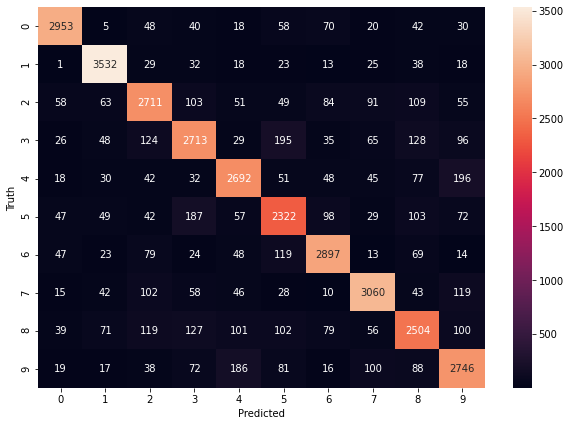

In [ ]:
#Matriz de confusão para facilitar a visualização da acuracia

cmrforest = confusion_matrix(y_train_dt, y_train_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
arvore.score(x_test_dt, y_test_dt)

In [ ]:
#Separar as 5 amostragens


x_amostragens = data_DT.iloc[:,1:]
y_amostragens = data_DT.iloc[:,0]

x_train_dt_1, x_test_dt_1, y_train_dt_1, y_test_dt_1 = train_test_split(x_amostragens, y_amostragens, test_size = 0.2)
x_train_dt_2, x_test_dt_2, y_train_dt_2, y_test_dt_2 = train_test_split(x_amostragens, y_amostragens, test_size = 0.2)
x_train_dt_3, x_test_dt_3, y_train_dt_3, y_test_dt_3 = train_test_split(x_amostragens, y_amostragens, test_size = 0.2)
x_train_dt_4, x_test_dt_4, y_train_dt_4, y_test_dt_4 = train_test_split(x_amostragens, y_amostragens, test_size = 0.2)
x_train_dt_5, x_test_dt_5, y_train_dt_5, y_test_dt_5 = train_test_split(x_amostragens, y_amostragens, test_size = 0.2)

In [ ]:
#treinamento arvore com as amostragens

treino_1 = arvore.fit(x_train_dt_1, y_train_dt_1)
treino_2 = arvore.fit(x_train_dt_2, y_train_dt_2)
treino_3 = arvore.fit(x_train_dt_3, y_train_dt_3)
treino_4 = arvore.fit(x_train_dt_4, y_train_dt_4)
treino_5 = arvore.fit(x_train_dt_5, y_train_dt_5)

In [ ]:
#acurácia dos testes da arvore

acuracia_1 = treino_1.score(x_test_dt_1, y_test_dt_1)
acuracia_2 = treino_2.score(x_test_dt_2, y_test_dt_2)
acuracia_3 = treino_3.score(x_test_dt_3, y_test_dt_3)
acuracia_4 = treino_4.score(x_test_dt_4, y_test_dt_4)
acuracia_5 = treino_5.score(x_test_dt_5, y_test_dt_5)

acuracia_geral = [acuracia_1, acuracia_2, acuracia_3, acuracia_4, acuracia_5]

print("Acurácia 1: ", acuracia_1)
print("Acurácia 2: ", acuracia_2)
print("Acurácia 3: ", acuracia_3)
print("Acurácia 4: ", acuracia_4)
print("Acurácia 5: ", acuracia_5)
print("\n")

#media e desvio padrão da DTC
media = (acuracia_1 + acuracia_2 + acuracia_3 + acuracia_4 + acuracia_5) / 5
print("Média acurácia DTC:", media)


desvio_padrao_dtc = np.std(acuracia_geral)
print("Desvio padrão DTC: ", desvio_padrao_dtc)

Acurácia 1:  0.9741666666666666
Acurácia 2:  0.9727380952380953
Acurácia 3:  0.9682142857142857
Acurácia 4:  0.9720238095238095
Acurácia 5:  0.8526190476190476


Média acurácia DTC: 0.9479523809523809
Desvio padrão DTC:  0.04770732294031514


#Comparação das médias e desvios

**MÉDIAS:**

**Média acurácia KNN:** 0.985

**Média acurácia DTC:** 0.945

**Média acurácia MPL:** 0.921

**DESVIO PADRÃO:**

**Desvio padrão KNN:**  0.004

**Desvio padrão DTC:**  0.047

**Desvio padrão MPL:**  0.004

#**VALORES PODEM ALTERAR, JÁ QUE A CADA EXECUÇÃO OS DATASETS SÃO RANDOMIZADOS**